In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import sklearn.metrics as metric
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier

# Задание 1

## Decision Tree Classification¶

In [2]:
data=pd.read_csv('../data/smoke_detector_task.csv')
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,No
1,1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,No
2,2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,No
3,3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,No
4,4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,No


Предобработаем датасет: 

In [3]:
data=data.drop(['Unnamed: 0'],axis=1)

In [4]:
data=data.dropna()

In [5]:
dict1 = {'Yes': '1', 'No': '0'}

data['Fire Alarm'] = data['Fire Alarm'].map(dict1)
data['Fire Alarm']=data['Fire Alarm'].astype(int)

In [6]:
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


Приступим к обучению:

In [7]:
X = data.drop(['Fire Alarm'], axis=1)
y= data['Fire Alarm']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [9]:
parameters = {'max_depth': np.arange(1, 10, 1)}
gini_optimal = RandomizedSearchCV(DecisionTreeClassifier(), parameters).fit(X_train, y_train)
gini_optimal.best_params_['max_depth']

C:\Users\djego\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


6

In [10]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=gini_optimal.best_params_['max_depth'], random_state=0)

In [11]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [12]:
y_pred_gini = clf_gini.predict(X_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9998


In [13]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9998


[Text(0.5489130434782609, 0.9285714285714286, 'x[13] <= 5743.5\ngini = 0.408\nsamples = 48482\nvalue = [13848, 34634]'),
 Text(0.5054347826086957, 0.7857142857142857, 'x[5] <= 13206.5\ngini = 0.384\nsamples = 18693\nvalue = [13848, 4845]'),
 Text(0.20652173913043478, 0.6428571428571429, 'x[7] <= 933.979\ngini = 0.21\nsamples = 13510\nvalue = [11899, 1611]'),
 Text(0.08695652173913043, 0.5, 'x[13] <= 36.5\ngini = 0.04\nsamples = 778\nvalue = [16, 762]'),
 Text(0.043478260869565216, 0.35714285714285715, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.13043478260869565, 0.35714285714285715, 'gini = 0.0\nsamples = 762\nvalue = [0, 762]'),
 Text(0.32608695652173914, 0.5, 'x[2] <= 57.445\ngini = 0.124\nsamples = 12732\nvalue = [11883, 849]'),
 Text(0.21739130434782608, 0.35714285714285715, 'x[13] <= 3319.5\ngini = 0.086\nsamples = 12386\nvalue = [11826, 560]'),
 Text(0.13043478260869565, 0.21428571428571427, 'x[13] <= 3.5\ngini = 0.0\nsamples = 9790\nvalue = [9789, 1]'),
 Text(0.086956

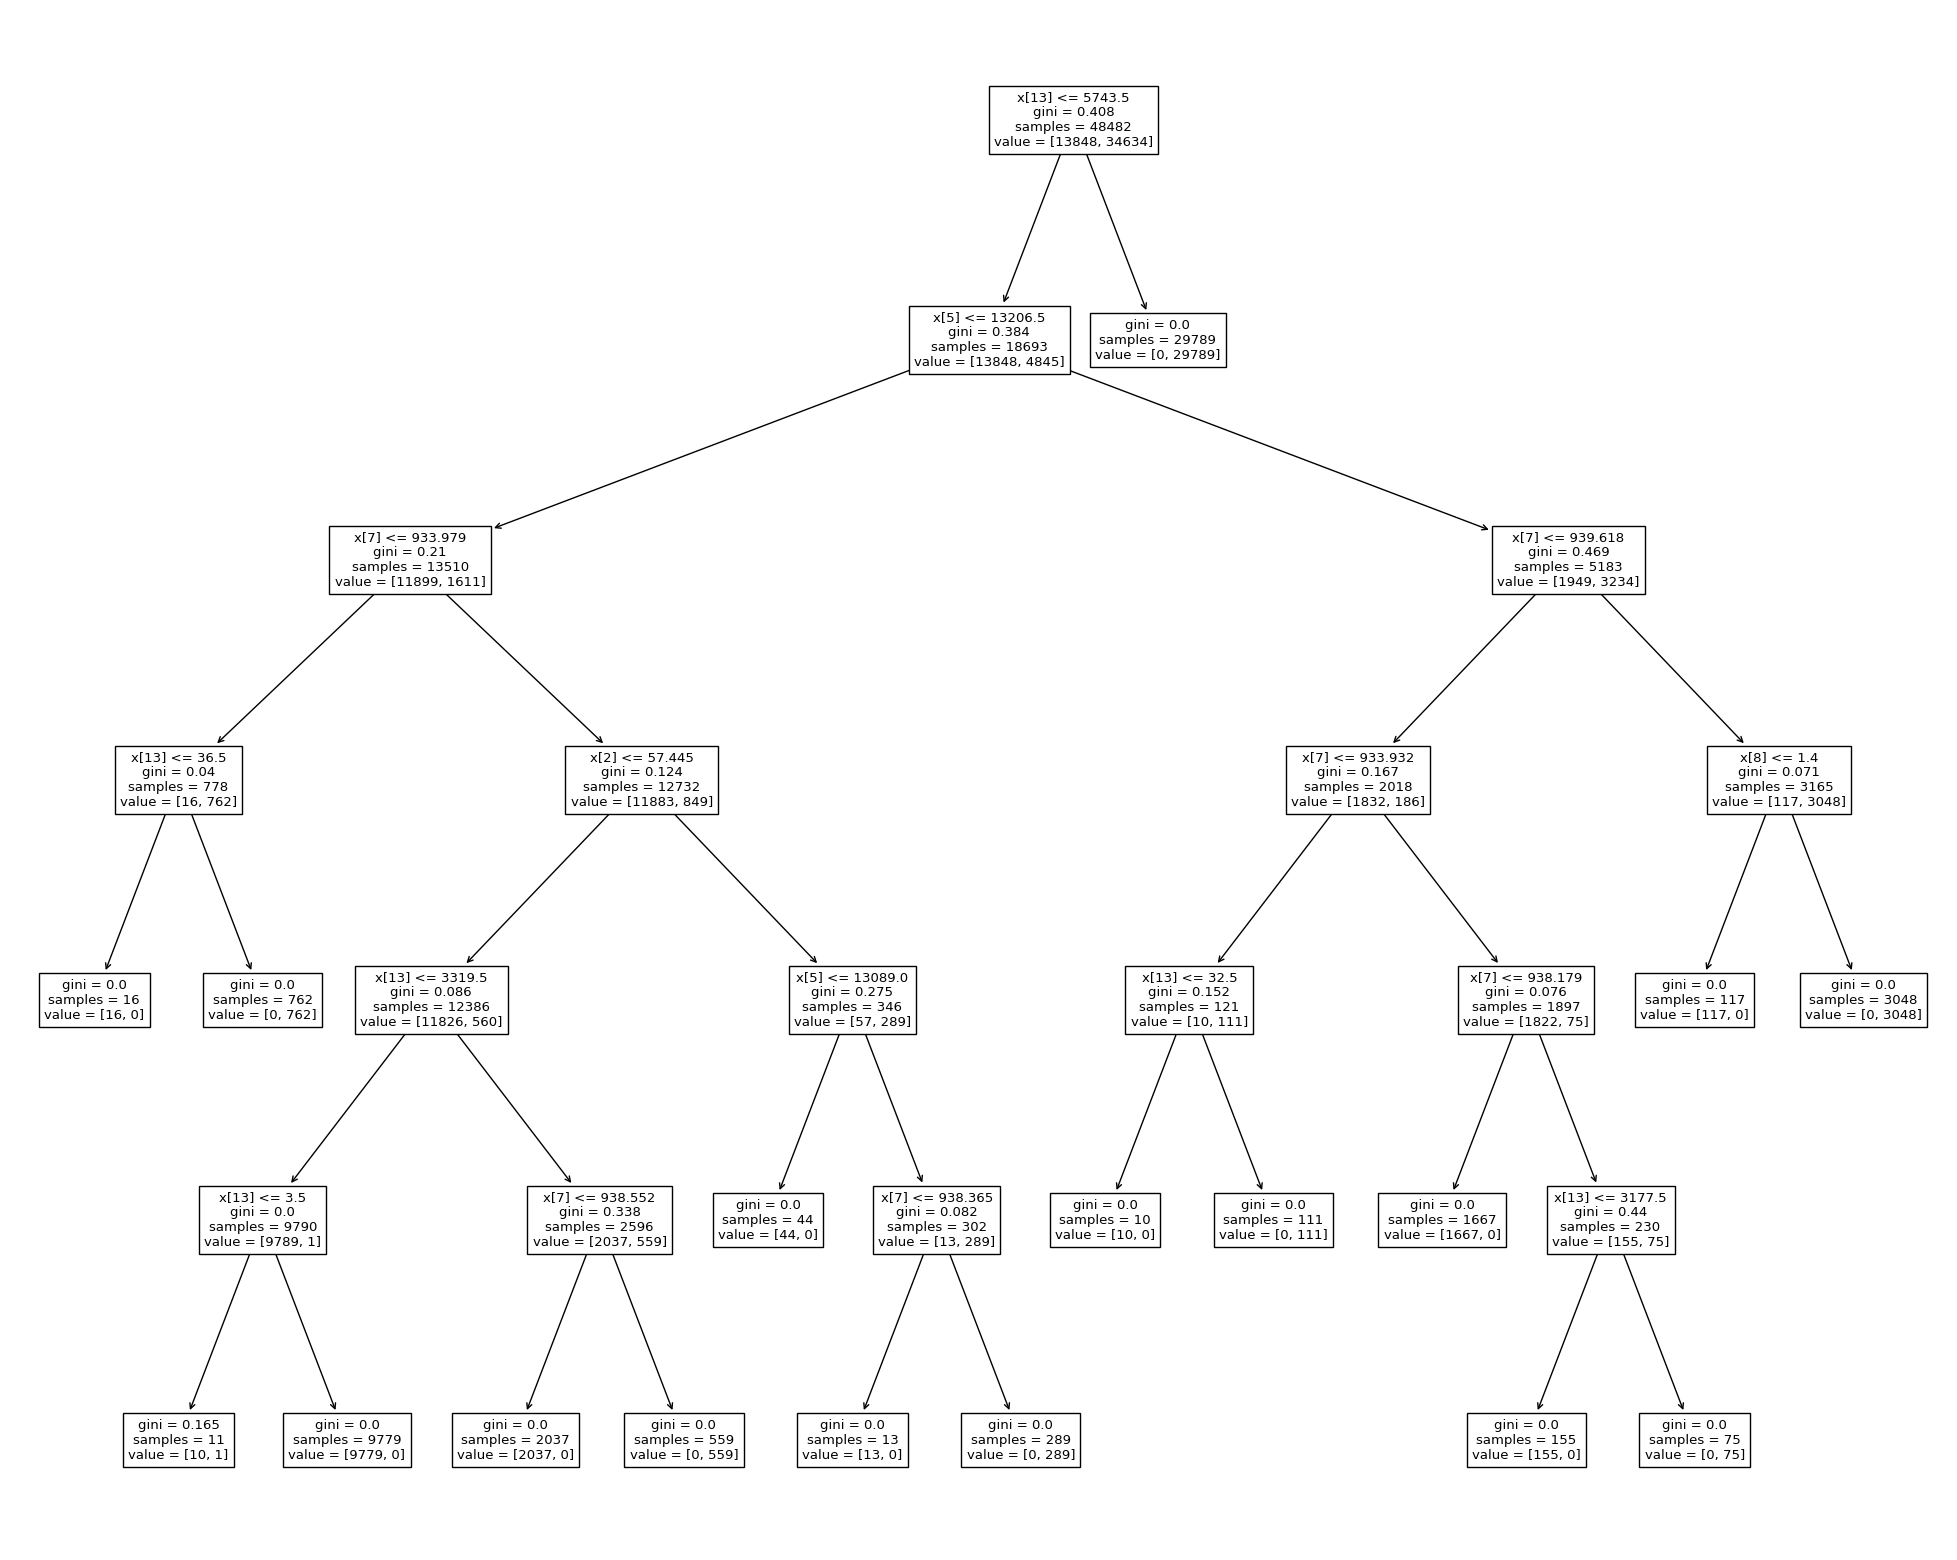

In [14]:
plt.figure(figsize=(25,20))

from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

## Пикарет классификация:

In [15]:
from pycaret.classification import *

In [16]:
setup(data=data,  target='Fire Alarm', session_id=555, train_size=0.7, preprocess=True)

,Description,Value
0,Session id,555
1,Target,Fire Alarm
2,Target type,Binary
3,Original data shape,"(60603, 15)"
4,Transformed data shape,"(60603, 15)"
5,Transformed train set shape,"(42422, 15)"
6,Transformed test set shape,"(18181, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [17]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [18]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9998,0.9998,0.9997,1.0000,0.9998,0.9994,0.9994
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9993,0.9990,0.9997,0.9993,0.9995,0.9983,0.9983
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9993,0.9995,0.9990,1.0000,0.9995,0.9983,0.9983
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


## Ансамбли:

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [20]:
BC = BaggingClassifier()
BC.fit(X_train, y_train)
y_pred_BagC = BC.predict(X_test)

In [21]:
Grad = GradientBoostingClassifier()
Grad.fit(X_train, y_train)
y_pred_GradC = Grad.predict(X_test)

In [22]:
estimators = [('rf', RandomForestClassifier())]

Stack = StackingClassifier(estimators=estimators, final_estimator=KNeighborsClassifier(n_neighbors=5))
Stack.fit(X_train, y_train)
y_pred_StackC = Stack.predict(X_test)

In [23]:
print('Bag  Accuracy = {}'.format(accuracy_score(y_test, y_pred_BagC)))
print('Grad Accuracy = {}'.format(accuracy_score(y_test, y_pred_GradC)))
print('Stack Accuracy = {}'.format(accuracy_score(y_test, y_pred_StackC)))

Bag  Accuracy = 0.9998349971124495
Grad Accuracy = 0.9997524956686742
Stack Accuracy = 0.9997524956686742


## catboost, xgboost, lightgbm

In [24]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=2,
                          learning_rate=0.5,
                          depth=10)

model.fit(X_train, y_train)

y_pred_catC = model.predict(X_test)

print(classification_report(y_test, y_pred_catC))
confusion_matrix(y_test, y_pred_catC)

0:	learn: 0.3176578	total: 305ms	remaining: 305ms
1:	learn: 0.1761984	total: 475ms	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3462
           1       1.00      1.00      1.00      8659

    accuracy                           1.00     12121
   macro avg       1.00      1.00      1.00     12121
weighted avg       1.00      1.00      1.00     12121



array([[3454,    8],
       [   3, 8656]], dtype=int64)

In [25]:
from xgboost import XGBClassifier


XGB_classifier = XGBClassifier(eta=0.1, max_depth=6)
XGB_classifier.fit(X_train.to_numpy(), y_train.to_numpy())

y_pred_xgbC = XGB_classifier.predict(X_test)
confusion_matrix(y_test, y_pred_xgbC )

array([[3462,    0],
       [   3, 8656]], dtype=int64)

In [26]:
from lightgbm import LGBMClassifier

lbm = LGBMClassifier(force_row_wise=True)
lbm.fit(X_train.to_numpy(), y_train.to_numpy())

y_pred_lbmC = lbm.predict(X_test)
confusion_matrix(y_test, y_pred_xgbC )

[LightGBM] [Info] Number of positive: 34634, number of negative: 13848
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 48482, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.714368 -> initscore=0.916695
[LightGBM] [Info] Start training from score 0.916695


array([[3462,    0],
       [   3, 8656]], dtype=int64)

## Перейдём к дереву регрессий

In [27]:
data=pd.read_csv('../data/moldova_cars_task.csv')

Предобработаем :

In [28]:
data=data.dropna()

In [29]:
data=data.drop_duplicates()

In [30]:
data=data.rename(
    columns={
        'Engine_capacity(cm3)':'Engine_capacity',
        'Price(euro)':'Price'
    }
)

In [31]:
data=pd.get_dummies(data)

In [32]:
data.head()

,Year,Distance,Engine_capacity,Price,Make_ARO,Make_Abarth,Make_Acura,Make_Alfa Romeo,Make_Alta marca,Make_Aston Martin,...,Style_Sedan,Style_Universal,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Transmission_Automatic,Transmission_Manual
0,2011.0,195000.0,1800.0,7750.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2014.0,135000.0,1500.0,8550.0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
2,1998.0,1.0,1400.0,2200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2012.0,110000.0,1500.0,6550.0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
4,2006.0,200000.0,1600.0,4100.0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [33]:
yreg = data["Price"]
Xreg = data.drop(["Price"], axis=1)

In [34]:
Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(Xreg, yreg, test_size=0.2)

In [35]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'max_depth': np.arange(1, 10, 1)}

reg_optimal = RandomizedSearchCV(DecisionTreeRegressor(), parameters).fit(Xreg_train, yreg_train)
reg_optimal.best_params_

{'max_depth': 6}

In [36]:
reg = DecisionTreeRegressor(max_depth=reg_optimal.best_params_['max_depth'])
reg.fit(Xreg_train, yreg_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')

In [37]:
print('Training set score: {:.4f}'.format(reg.score(Xreg_train, yreg_train)))
print('Test set score: {:.4f}'.format(reg.score(Xreg_test, yreg_test)))

Training set score: 0.9889
Test set score: 0.6822


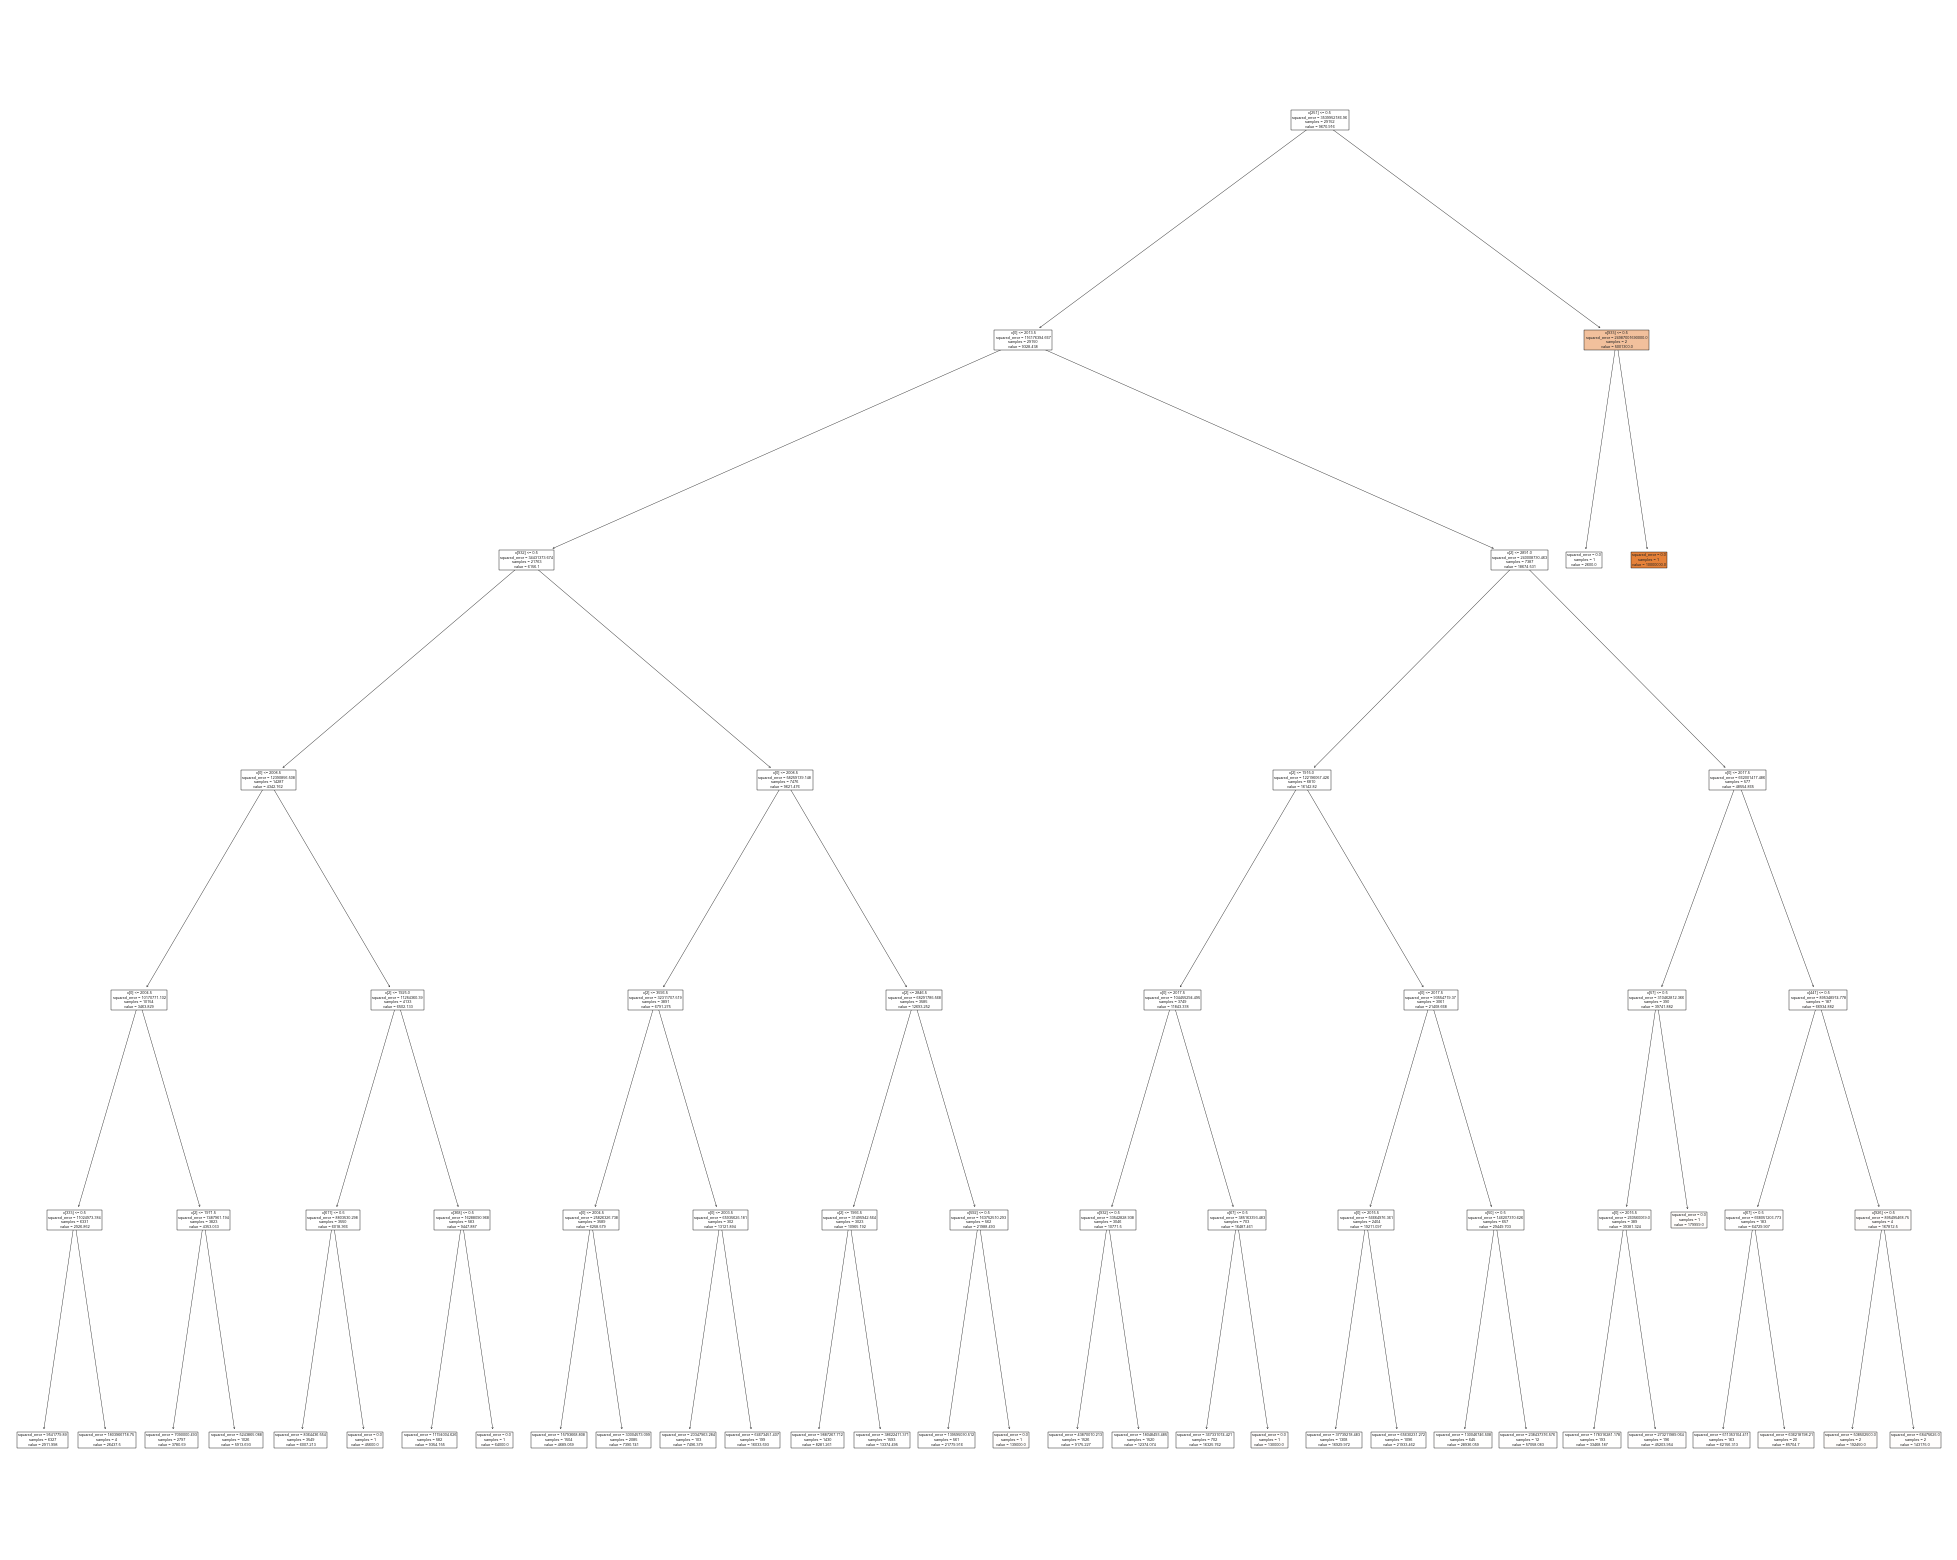

In [38]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, filled=True)

## Пикарет регрессия:

In [39]:
from pycaret.regression import *

In [40]:
setup(data=data,  target='Price', session_id=123, train_size=0.7, preprocess=True)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(36441, 935)"
4,Transformed data shape,"(36441, 935)"
5,Transformed train set shape,"(25508, 935)"
6,Transformed test set shape,"(10933, 935)"
7,Numeric features,934
8,Preprocess,True
9,Imputation type,simple


In [41]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [42]:
dt_reg = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2477.4053,37054082.4425,6087.2065,0.6496,0.5554,0.4785
1,2555.8876,57021196.5520,7551.2381,0.4929,0.5339,0.4228
2,2531.8665,112027847.4358,10584.3208,-0.1730,0.6230,0.4906
3,6008.9328,39198863752.9511,197987.0293,-408.8197,0.5253,1.8843
4,2706.7717,129050176.8985,11360.0254,-0.2212,0.5996,0.5070
5,2398.0310,29018746.2308,5386.9051,0.7129,0.5239,0.4201
6,2533.8290,37840082.9067,6151.4293,0.7104,0.5847,0.4668
7,6385.3732,39223170257.5186,198048.4038,0.0001,0.5918,0.5602
8,2385.6241,32595401.1263,5709.2382,0.6760,0.5554,1.7627


In [ ]:
tuned_dt_reg = tune_model(dt_reg)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:31:37
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Ансамбли:

In [42]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [43]:
BC = BaggingRegressor()
BC.fit(Xreg_train, yreg_train)
y_pred_Bag = BC.predict(Xreg_test)

In [44]:
Grad = GradientBoostingRegressor()
Grad.fit(Xreg_train, yreg_train)
y_pred_Grad = Grad.predict(Xreg_test)

In [45]:
estimators = [('lr', Ridge(alpha=0.74))]

Stack = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
Stack.fit(Xreg_train, yreg_train)
y_pred_Stack = Stack.predict(Xreg_test)

In [46]:
print('Bag  Accuracy = {}'.format(BC.score(Xreg_test, yreg_test)))
print('Grad Accuracy = {}'.format(Grad.score(Xreg_test, yreg_test)))
print('Stack Accuracy = {}'.format(Stack.score(Xreg_test, yreg_test)))

Bag  Accuracy = 0.7116466564662906
Grad Accuracy = 0.7490747349100888
Stack Accuracy = 0.043169860703556884


## catboost, xgboost, lightgbm

In [56]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=2,
                          learning_rate=0.5,
                          depth=10)

model.fit(Xreg_train.to_numpy(), yreg_train.to_numpy())

y_pred_catC = model.predict(Xreg_test)

0:	learn: 52314.2142352	total: 82.7ms	remaining: 82.7ms
1:	learn: 46046.5581986	total: 170ms	remaining: 0us


In [57]:
from xgboost import XGBRegressor

XGB_regressor = XGBRegressor(eta=0.1, max_depth=6)
XGB_regressor.fit(Xreg_train, yreg_train)

y_pred_xgbC = XGB_regressor.predict(Xreg_test)

In [58]:
from lightgbm import LGBMRegressor

lbm = LGBMRegressor(force_row_wise=True)
lbm.fit(Xreg_train.to_numpy(), yreg_train.to_numpy())

y_pred_lbmC = lbm.predict(Xreg_test)

[LightGBM] [Info] Total Bins 1144
[LightGBM] [Info] Number of data points in the train set: 29152, number of used features: 311
[LightGBM] [Info] Start training from score 9670.916472


In [59]:
print(model.score(Xreg_test, yreg_test))
print(XGB_regressor.score(Xreg_test, yreg_test))
print(lbm.score(Xreg_test, yreg_test))

0.02501470786164539
0.7859934169437867
-3.4740649441380675
